<h1>Classification kNN </h1>

<h2> kNN algorithm from scratch </h2>

<h3> Finding the distance between two points </h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def distance(p1,p2):
    '''finds dist p1-p2, assume arrays as inputs'''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [13]:
p1= np.array([1,5])
p2= np.array([5,9])
distance(p1,p2)

5.656854249492381

<p> <span style="color:purple"> given a and b compute `dist` the euclidian distance between them </span>

In [11]:
a=np.array([1,1])
b=np.array([3,3])

In [12]:
dist= np.sqrt(np.sum(np.power(b-a,2)))
dist

2.8284271247461903

<h3>Majority Vote </h3>


In [2]:
def simple_count_votes(votes):
    '''returns a dict of counting'''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] +=1
        else:
            vote_counts[vote] = 1
    return vote_counts

In [14]:
votes= [1,2,3,1,2,3,3,3,3,3,1,2,2]
vote_counts = simple_count_votes(votes)
vote_counts

{1: 3, 2: 4, 3: 6}

In [15]:
def majority_vote(votes):
    '''returns winner from list of votes. it breaks tie by random.choice'''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] +=1
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items(): # key , value
        if count == max_count:
            winners.append(vote) # append vote in the list
    return np.random.choice(winners) #break the tie (if there is such)


In [16]:
votes= [1,2,3,1,2,3,3,3,3,3,1,2,2]
winner = majority_vote(votes)
winner

3

In [17]:
votes= [2,2,2,3,3,3,1]
winner = majority_vote(votes)
winner

2

<p> <span style="color:purple"> define majority_vote1 from scratch   </span>

In [18]:
#def majority_vote1(votes):
    
   
 #define a dict of vote counts "vote_counts" and  count (in loop) frequency in the list
 

#define a list "winners" , take the maximum value in "max_count" var using  dict.values()


#loop through dict  key, value with .items() and append the keys that == max_count in list winners


# use np.random.choice on winners to break tie


   

In [19]:
'''
votes= [2,1,2,2,2,2,4,5,5,5,5,5,5,5,5]
winner = majority_vote1(votes)
winner
'''

'\nvotes= [2,1,2,2,2,2,4,5,5,5,5,5,5,5,5]\nwinner = majority_vote1(votes)\nwinner\n'

In [20]:
import scipy.stats as ss
def majority_vote_short(votes):
    '''returns the most common element in votes, doesnt break tie randomly'''
    mode, count = ss.mstats.mode(votes)
    return(mode)

In [21]:
votes= [2,2,2,3,3,3,3,1]
#winner = majority_vote_short(votes)
#winner

<h3> Finding Nearest Neighbors
 </h3>

`orderedIndexes = np.argsort(array)` <br>
`orderedIndexes = np.argsort(-array)` for descending

In [3]:
arr = np.array([33,4,55,100,2])
inds = np.argsort(arr)
print(arr)
print("sorted indices: {:}".format(inds))
print("sorted array: {:}".format(arr[inds]))

[ 33   4  55 100   2]
sorted indices: [4 1 0 2 3]
sorted array: [  2   4  33  55 100]


In [23]:

def find_nearest_neighbors(p, points, k=5):
    '''find the k nearest neighbors of p and return their indices (ind)'''
#loop all points
    distances = np.zeros(points.shape[0]) #rows of points
    for i in range(len(distances)):   
#compute the distance between point p and every other point
       distances[i] = distance(p,points[i])
#sort distances and return those k points that are nearest to point p
    ind = np.argsort(distances           )
    
    return ind[ :k]



In [24]:
points = np.array([[1,1,1],[2,1,2],[3,2,3],[4,3,2]])
p= np.array([[2,2,2]])

ind = find_nearest_neighbors(p,points,1)
print(points[ind])


[[2 1 2]]


<h3>Predict the class of the point </h3>

In [25]:
def knn_predict(p, points, outcomes , k=5):
    
    ind= find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [26]:
#predict the class (outcoome)
outcomes= np.array([0,0,0,0,1,1,1,1,1])
points = np.array([ [1,1],[1,2],[2,3],[3,2], [4,4],[4,2],[6,3],[3,3], [5,5]])
p =  np.array([2.5, 2.7])

knn_predict(p, points, outcomes, 2)

0

<h3> Applying with synthetic data </h3>

In [27]:
import matplotlib.pyplot as plt
def generate_synth_data(n=50):
    '''create two sets of point for bivariate distribution , n repetitions'''
    points = np.concatenate( ( ss.norm(0,1).rvs((n,2)),( ss.norm(1,1).rvs((n,2)) ) ), axis=0 ) #ss is scipy.stats
    outcomes = np.concatenate( ( np.repeat(0,n), np.repeat(1,n) ) )
    return  (points, outcomes)

In [28]:
#knowing rvs
import scipy.stats as ss
n=3
normarr=ss.norm(0,1).rvs(n) 
normarr


array([-0.90971428, -0.41276369,  0.39429041])

<h4> making a Prediction Grid </h4>

In [29]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    '''Classify each point in the prediction grid.'''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    #object called prediction_grid
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return(xx, yy, prediction_grid)

`meshgrid()` takes 2 or more vectors, if 2 one with x other y values
returns matrices one with x values other with y values for grid point

<h4> plot the prediction grid</h4>

In [30]:
(predictors, outcomes) = generate_synth_data()
print(predictors.shape)
print(outcomes.shape )

(100, 2)
(100,)


In [31]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

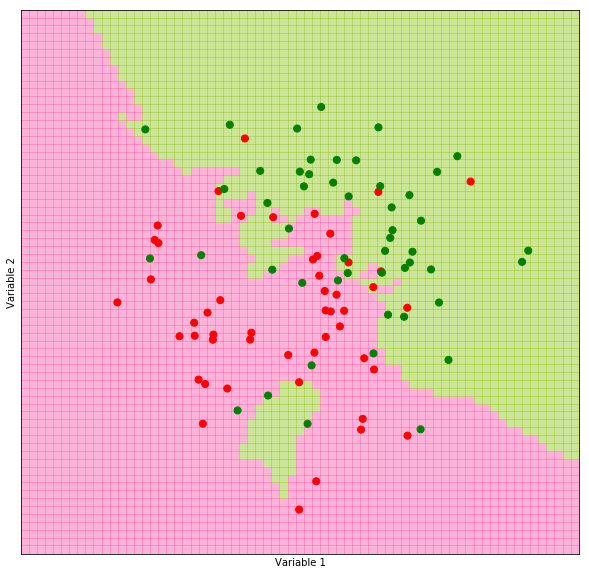

In [32]:
#definitions
k=5
filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4)
h = 0.1


#call the function
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

<h3>Applying kNN on iris db </h3>

In [33]:
from sklearn import datasets
iris = datasets.load_iris()

In [34]:
iris['data'][:4,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [35]:
iris.target[:4]

array([0, 0, 0, 0])

In [36]:
predictors = iris.data[:, 0:2] #first 2 cols
outcomes  = iris.target

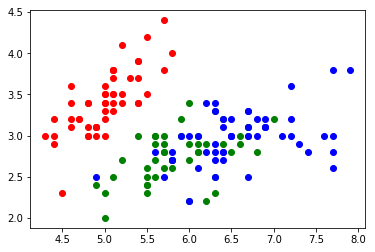

In [37]:
#plot
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], 'ro')
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], 'go')
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], 'bo')
plt.savefig("iris.pdf")

<h2> another model for KNN </h2>

In [38]:

from collections import Counter

a majority vote that "reduces" to break tie

In [39]:

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest



In [40]:
labels=['b','c','b','c','b','c','a','a','a']
majVote= majority_vote(labels)
print(majVote)
labels2=['b','c','b','c','b','c','a','a','a','a', 'a']

b


<p> <span style="color:purple"> check `majority_vote` for labels2 </span>

In [41]:
majVote2 = majority_vote(labels2)
majVote2

'a'

In [42]:
labeledPoints = [(2,'a'),(3,'a'),(2.5,'a'),(2.5,'a'),(2.5,'b'),(4.2,'b'),(4,'a'),(3,'b'), (8,'c'),(3,'b'),(3.5,'b'),(3.5,'b')]
point3= 3
point4=4

In [51]:
import math
def knn_classify(k, labeled_points, new_point, echo=False):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
   # size= lambda planet: planet[1]
    #pointDist = lambda point: point[0]
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,key=lambda point_label: distance(point_label[0], new_point))
    if echo :
        print(by_distance)
#    planets.sort(key=size, reverse=True)

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
    if echo:    
        print(k_nearest_labels)

    # and let them vote
    return majority_vote(k_nearest_labels)

#helpers
def distance(v, w):
    return math.sqrt(squared_distance(v, w))
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)
def vector_subtract( v , w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip([v],[w])]
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [44]:
x=5
y=3

vector_subtract(x,y)

[2]

In [50]:
knn_classify(4,labeledPoints, 7)

[(8, 'c'), (4.2, 'b'), (4, 'a'), (3.5, 'b'), (3.5, 'b'), (3, 'a'), (3, 'b'), (3, 'b'), (2.5, 'a'), (2.5, 'a'), (2.5, 'b'), (2, 'a')]
['c', 'b', 'a', 'b']


'b'

<p> <span style="color:purple"> try classity  for point 3 and k= 2,4,5 </span>

In [85]:
for k in  ([1,4,5]):
    print(k)
    print (knn_classify(k,labeledPoints, 3))

1
[(3, 'a'), (3, 'b'), (3, 'b'), (2.5, 'a'), (2.5, 'a'), (2.5, 'b'), (3.5, 'b'), (3.5, 'b'), (2, 'a'), (4, 'a'), (4.2, 'b'), (8, 'c')]
['a']
a
4
[(3, 'a'), (3, 'b'), (3, 'b'), (2.5, 'a'), (2.5, 'a'), (2.5, 'b'), (3.5, 'b'), (3.5, 'b'), (2, 'a'), (4, 'a'), (4.2, 'b'), (8, 'c')]
['a', 'b', 'b', 'a']
b
5
[(3, 'a'), (3, 'b'), (3, 'b'), (2.5, 'a'), (2.5, 'a'), (2.5, 'b'), (3.5, 'b'), (3.5, 'b'), (2, 'a'), (4, 'a'), (4.2, 'b'), (8, 'c')]
['a', 'b', 'b', 'a', 'a']
a


In [ ]:
#markers and column dictionary 
